# Explore Upwelling Indices

In [1]:
# imports
import os
import xarray

import numpy as np
from scipy import stats
from scipy.interpolate import interp1d 

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator 

mpl.rcParams['font.family'] = 'stixgeneral'


import seaborn as sns

import pandas

from cugn import grid_utils
from cugn import utils as cugn_utils
from cugn import io as cugn_io
from cugn import annualcycle


# Load

## CUTI

In [6]:
cuti_file = '/home/xavier/Projects/Oceanography/data/CCS/Upwelling/CUTI_daily.nc'
#
ds_cuti = xarray.open_dataset(cuti_file)
ds_cuti

<xarray.Dataset> Size: 2MB
Dimensions:   (time: 13446, latitude: 17)
Coordinates:
  * time      (time) datetime64[ns] 108kB 1988-01-01 1988-01-02 ... 2024-10-23
  * latitude  (latitude) float64 136B 31.0 32.0 33.0 34.0 ... 45.0 46.0 47.0
Data variables:
    year      (time) float64 108kB ...
    month     (time) float64 108kB ...
    day       (time) float64 108kB ...
    CUTI      (time, latitude) float64 2MB ...
Attributes:
    Creation Date:  25-Oct-2024 18:49:33
    Description:    Daily Coastal Upwelling Transport Index (CUTI) for U.S. W...
    Reference:      Jacox et al. (2018), Coastal upwelling revisited: Ekman, ...

## CUGN

In [5]:
line = '90.0'
#
items = cugn_io.load_up(line)#, gextrem='low')
grid_extrem = items[0]
ds = items[1]

Loading: doxy_grid_line90.parquet
Loading: doxy_grid_line90.parquet
Found 29 unique clusters


# Examine a few

In [7]:
ds

<xarray.Dataset> Size: 290MB
Dimensions:               (profile: 54842, trajectory: 70, depth: 50)
Coordinates:
  * profile               (profile) int32 219kB 0 1 2 3 ... 54839 54840 54841
    lat                   (profile) float64 439kB 33.44 33.44 ... 32.89 32.88
    lon                   (profile) float64 439kB -117.7 -117.7 ... -117.3
    lat_uv                (profile) float64 439kB 33.44 33.44 ... 32.89 32.88
    lon_uv                (profile) float64 439kB -117.7 -117.7 ... -117.3
    time                  (profile) datetime64[ns] 439kB 2006-10-19T17:51:00 ...
    time_uv               (profile) datetime64[ns] 439kB 2006-10-19T17:41:00 ...
  * depth                 (depth) int32 200B 10 20 30 40 50 ... 470 480 490 500
Dimensions without coordinates: trajectory
Data variables: (12/19)
    u_depth_mean          (profile) float64 439kB 0.03852 -0.01392 ... 0.04539
    v_depth_mean          (profile) float64 439kB -0.06798 0.02441 ... 0.02128
    mission               (profile) int32 219kB 0 0 0 0 0 0 ... 69 69 69 69 69
    mission_profile       (profile) int32 219kB 1 2 3 4 5 ... 976 977 978 979
    trajectory_index      (profile) int32 219kB 0 0 0 0 0 0 ... 69 69 69 69 69
    mission_name          (trajectory) |S8 560B b'06A01301' ... b'22C01301'
    ...                    ...
    CT                    (depth, profile) float64 22MB 17.76 17.97 ... nan nan
    sigma0                (depth, profile) float64 22MB 24.07 24.03 ... nan nan
    SA                    (depth, profile) float64 22MB 33.49 33.5 ... nan nan
    SO                    (depth, profile) float64 22MB nan nan nan ... nan nan
    AOU                   (depth, profile) float64 22MB nan nan nan ... nan nan
    N                     (depth, profile) float64 22MB 12.03 11.15 ... nan nan
Attributes: (12/50)
    id:                              CUGN_line_90
    date_created:                    2023-08-22T08:43:54Z
    time_coverage_start:             2006-10-19T17:41:00Z
    time_coverage_end:               2023-03-20T15:42:26Z
    geospatial_bounds_crs:           EPSG:4326
    geospatial_bounds:               POLYGON ((-121.0906975 21.58784, -121.09...
    ...                              ...
    platform_institution:            Scripps Institution of Oceanography
    sea_name:                        Coastal Waters of California
    summary:                         The overarching goal of the California U...
    references:                      Rudnick, D. L. (2016). Ocean research en...
    title:                           California Underwater Glider Network - L...
    site:                            CUGN Line 90

## SO

In [10]:
SO_ex = ds.SO.data > 1.1
np.sum(SO_ex)
#
idx = np.where(SO_ex)
SO_profiles = idx[1]
SO_profiles

array([32958, 32959, 32964, ..., 38765, 38065, 38081])

In [17]:
SO_lat = ds.lat.data[SO_profiles]
SO_t = ds.time.data[SO_profiles]

## Match in time and lat

In [14]:
ds_cuti.time

<xarray.DataArray 'time' (time: 13446)> Size: 108kB
array(['1988-01-01T00:00:00.000000000', '1988-01-02T00:00:00.000000000',
       '1988-01-03T00:00:00.000000000', ..., '2024-10-21T00:00:00.000000000',
       '2024-10-22T00:00:00.000000000', '2024-10-23T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 108kB 1988-01-01 1988-01-02 ... 2024-10-23
Attributes:
    _CoordinateAxisType:  Time
    axis:                 T
    long_name:            Time
    time_origin:          01-JAN-1970

In [18]:
SO_t[0]

np.datetime64('2017-03-14T02:17:03.000000000')

In [21]:
ii = np.argmin(np.abs(ds_cuti.time.data - SO_t[0]))
ds_cuti.time[ii], SO_t[0]

(<xarray.DataArray 'time' ()> Size: 8B
 array('2017-03-14T00:00:00.000000000', dtype='datetime64[ns]')
 Coordinates:
     time     datetime64[ns] 8B 2017-03-14
 Attributes:
     _CoordinateAxisType:  Time
     axis:                 T
     long_name:            Time
     time_origin:          01-JAN-1970,
 np.datetime64('2017-03-14T02:17:03.000000000'))

In [25]:
itimes, ilats = [], []
for lat, t in zip(SO_lat, SO_t):
    # Time
    itime = np.argmin(np.abs(ds_cuti.time.data - t))
    # Latitutde
    ilat = np.argmin(np.abs(ds_cuti.latitude.data - lat))
    # Save
    itimes.append(itime)
    ilats.append(ilat)

In [28]:
ds_cuti.time[itimes].max()

<xarray.DataArray 'time' ()> Size: 8B
array('2023-03-21T00:00:00.000000000', dtype='datetime64[ns]')

## Plot

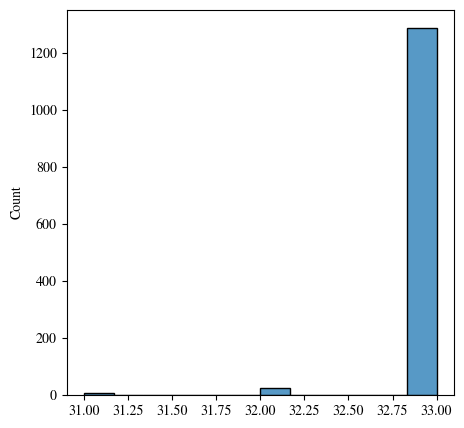

In [29]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
#
_ = sns.histplot(ds_cuti.latitude[ilats], ax=ax)
#
plt.show()